# Pulse shape fitting

## Neutron pulse

In [13]:
import os
import sys
root_folder = os.path.dirname(os.getcwd())
sys.path.append(root_folder)
from ResoFit.calibration import Calibration
from ResoFit.fitresonance import FitResonance
from ResoFit.experiment import Experiment
from ResoFit.experiment import Experiment
from ResoFit._pulse_shape import ProtonPulse
import matplotlib.pyplot as plt
import numpy as np
import pprint
from ResoFit._utilities import get_foil_density_gcm3
from ResoFit._utilities import Layer
import lmfit

In [3]:
# Global parameters
energy_min = 7
energy_max = 600
energy_step = 0.01
# Input sample name or names as str, case sensitive
# layer_1 = 'U'
# thickness_1 = 0.018
# density_1 = None
layer_2 = 'Gd'
thickness_2 = 0.15
density_2 = None
# layer_3 = 'Cd'
# thickness_3 = 0.015
# density_3 = None
layer = Layer()
# layer.add_layer(layer=layer_1, thickness_mm=thickness_1, density_gcm3=density_1)
layer.add_layer(layer=layer_2, thickness_mm=thickness_2, density_gcm3=density_2)
# layer.add_layer(layer=layer_3, thickness_mm=thickness_3, density_gcm3=density_3)

folder = 'data/IPTS_19558/reso_data_19558'
data_file = 'Gd_thick.csv'
spectra_file = 'Image002_Spectra.txt'
image_start = None  # Can be omitted or =None
image_end = None  # Can be omitted or =None
norm_to_file = None  # 'sphere_background_1.csv'
baseline = True
each_step = False
table = True
grid = True
elements = True
isotopes = True
fit_vary = 'none'

repeat = 1
source_to_detector_m = 16.  # 16#16.445359069030175#16.447496101100739
offset_us = 0  # 0#2.7120797253959119#2.7355447625559037

+----------------- Calibration -----------------+
Params before:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                    0     -inf      inf     None     True     None     None
source_to_detector_m        16     -inf      inf     None     True     None     None

Params after:
Name                     Value      Min      Max   Stderr     Vary     Expr Brute_Step
offset_us                2.701     -inf      inf 0.008422     True     None     None
source_to_detector_m     16.45     -inf      inf 0.001133     True     None     None
Calibration chi^2 : 51.20647013690762



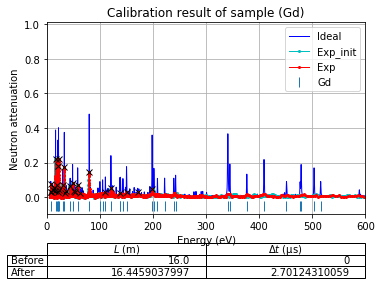

In [4]:
# Calibrate the peak positions
calibration = Calibration(data_file=data_file,
                          spectra_file=spectra_file,
                          raw_layer=layer,
                          energy_min=energy_min,
                          energy_max=energy_max,
                          energy_step=energy_step,
                          repeat=repeat,
                          folder=folder,
                          baseline=baseline)

calibration.norm_to(norm_to_file)
calibration.slice(slice_start=image_start, slice_end=image_end)

calibrate_result = calibration.calibrate(source_to_detector_m=source_to_detector_m,
                                         offset_us=offset_us,
                                         vary='all',
                                         each_step=each_step)
calibration.index_peak(thres=0.13, min_dist=21)

calibration.plot(before=True, all_elements=False, peak_id='all', save_fig=False, total=True)

+----------------- Fitting (none) -----------------+
Params before:
Name                Value      Min      Max   Stderr     Vary     Expr Brute_Step
density_gcm3_Gd     7.901        0      inf     None    False     None     None
thickness_mm_Gd      0.15        0      inf     None    False     None     None

Params after:
Name                Value      Min      Max   Stderr     Vary     Expr Brute_Step
density_gcm3_Gd     7.901        0      inf        0    False     None     None
thickness_mm_Gd      0.15        0      inf        0    False     None     None
Fitting chi^2 : 51.21796011406623

Molar-conc. (mol/cm3)	Before_fit	After_fit
Gd	0.05024483306836248	0.05024483306836248




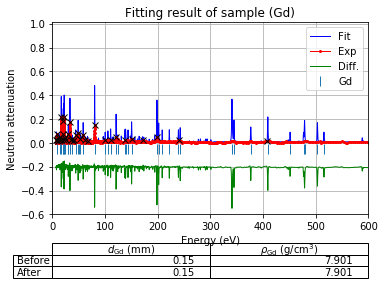

In [5]:
# Fit the peak height
fit = FitResonance(spectra_file=spectra_file,
                   data_file=data_file,
                   folder=folder,
                   repeat=repeat,
                   energy_min=energy_min,
                   energy_max=energy_max,
                   energy_step=energy_step,
                   calibrated_offset_us=calibration.calibrated_offset_us,
                   calibrated_source_to_detector_m=calibration.calibrated_source_to_detector_m,
                   norm_to_file=norm_to_file,
                   slice_start=image_start,
                   slice_end=image_end,
                   baseline=baseline)
fit_result = fit.fit(layer, vary=fit_vary, each_step=each_step)
fit.molar_conc()
fit.index_peak(thres=0.10, min_dist=25)
# fit.fit_iso(layer=layer_2)
fit.plot(peak_id='all', interp=False)
# fit.export('Exp_Gd_150_um.csv')

In [6]:
fit.df

,Fit_eV,Fit_attenuation,Exp_eV,Exp_attenuation,Diff._eV,Diff._attenuation
0,7.00,0.006178,105445.990554,0.032947,7.00,-0.205191
1,7.01,0.006141,96800.559674,0.028682,7.01,-0.205226
2,7.02,0.006106,89176.373968,0.023784,7.02,-0.202086
3,7.03,0.006077,82418.698620,0.020349,7.03,-0.205572
4,7.04,0.006050,76401.032099,0.022276,7.04,-0.209718
5,7.05,0.006026,71019.142600,0.022747,7.05,-0.205882
6,7.06,0.006006,66186.523970,0.020167,7.06,-0.204021
7,7.07,0.005989,61830.897696,0.018862,7.07,-0.205125
8,7.08,0.005975,57891.494544,0.023378,7.08,-0.206177
9,7.09,0.005964,54316.923384,0.028210,7.09,-0.204420


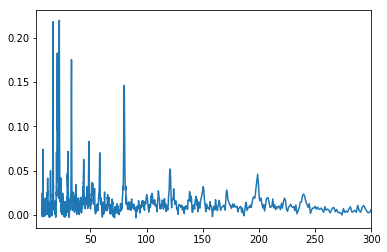

In [11]:
e = fit.df['Exp_eV']
a = fit.df['Exp_attenuation']
plt.plot(e,a)
plt.xlim(left=2, right=300)
plt.show()

## Proton pulse

In [14]:
proton_path = '/Users/Shawn/Dropbox (ORNL)/Postdoc_research/neutron_beam_shape/SNS/proton_pulse/waveform_20170901.txt'
proton_pulse = ProtonPulse(proton_path)

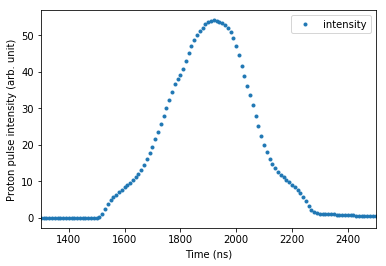

In [15]:
proton_pulse.shape_df.set_index('t_ns').plot(style='.')
plt.xlabel('Time (ns)')
plt.ylabel('Proton pulse intensity (arb. unit)')
plt.xlim(xmin=1300, xmax=2500)
# plt.savefig('proton.png',dpi=300, transparent=True)
plt.show()

In [18]:
p = proton_pulse.shape_df['intensity']

In [20]:
c = np.convolve(a, p)

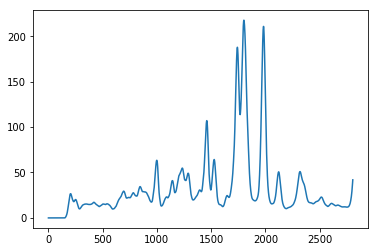

In [22]:
plt.plot(c)
plt.show()